In [1]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 1094, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 1094 (delta 73), reused 7 (delta 7), pack-reused 920 (from 2)
Receiving objects: 100% (1094/1094), 13.35 MiB | 13.84 MiB/s, done.
Resolving deltas: 100% (390/390), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
power_df = pd.read_csv('/content/DS4002/Project_2/DATA/impute_df.csv')
power_df.head()

,UTC Timestamp (Interval Ending),MISO Total Actual Load (MW),Indianapolis Temperature (Fahrenheit),Minneapolis Temperature (Fahrenheit),New Orleans International Airport Temperature (Fahrenheit),MISO Total Wind Generation (MW),GDP
0,2021-02-10 06:00:00,77859.97,19.9,0.0,64.0,5376.71,3.478772e+06
1,2021-02-10 07:00:00,76211.10,19.9,-0.9,63.0,5019.58,3.478798e+06
2,2021-02-10 08:00:00,75295.06,19.9,-4.0,63.0,4895.51,3.478824e+06
3,2021-02-10 09:00:00,75164.21,19.9,-2.0,63.0,4747.13,3.478850e+06
4,2021-02-10 10:00:00,75743.83,19.9,-2.0,62.1,4341.06,3.478876e+06


In [4]:
na_counts = power_df.isna().sum()
print(na_counts)
power_df.shape

UTC Timestamp (Interval Ending)                               0
MISO Total Actual Load (MW)                                   0
Indianapolis Temperature (Fahrenheit)                         0
Minneapolis Temperature (Fahrenheit)                          0
New Orleans International Airport Temperature (Fahrenheit)    0
MISO Total Wind Generation (MW)                               0
GDP                                                           0
dtype: int64


(32627, 7)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(power_df, test_size=0.2, random_state=42)
print("training set: " + str(len(train)) + ", test set: " + str(len(test)))

training set: 26101, test set: 6526


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train = train.drop(columns=['MISO Total Actual Load (MW)','UTC Timestamp (Interval Ending)'])
y_train = train['MISO Total Actual Load (MW)']
X_test = test.drop(columns=['MISO Total Actual Load (MW)','UTC Timestamp (Interval Ending)'])
y_test = test['MISO Total Actual Load (MW)']

model = RandomForestRegressor()
rf = model.fit(X_train, y_train)

y_hat = rf.predict(X_test)
r2 = r2_score(y_test, y_hat)
r2

0.875776298427665

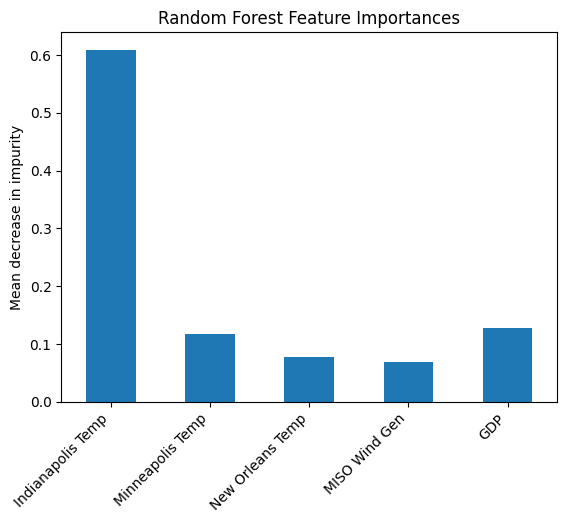

In [17]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
ax = forest_importances.plot.bar()
ax.set_ylabel("Mean decrease in impurity")
new_labels = ['Indianapolis Temp','Minneapolis Temp','New Orleans Temp',"MISO Wind Gen",'GDP']
ax.set_xticklabels(new_labels, rotation=45,ha='right')
plt.title("Random Forest Feature Importances")
plt.show()